# importing Libraries

In [1]:
import pandas as pd
import json
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings

# Importing File 

In [2]:
with open('electronics.json', 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data)

# checking Null values in File 

In [3]:
print(df.isnull().sum())

Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64


# converting datatypes 
## so we can apply manipulation on columns 

In [4]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')
df['Average_Spending_Per_Purchase'] = pd.to_numeric(df['Average_Spending_Per_Purchase'], errors='coerce')
df['Purchase_Frequency_Per_Month'] = pd.to_numeric(df['Purchase_Frequency_Per_Month'], errors='coerce')
df['Brand_Affinity_Score'] = pd.to_numeric(df['Brand_Affinity_Score'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    1000 non-null   object        
 1   Age                            960 non-null    float64       
 2   Gender                         1000 non-null   object        
 3   Income_Level                   1000 non-null   object        
 4   Address                        1000 non-null   object        
 5   Transaction_ID                 1000 non-null   object        
 6   Purchase_Date                  952 non-null    datetime64[ns]
 7   Product_ID                     1000 non-null   object        
 8   Product_Category               1000 non-null   object        
 9   Brand                          1000 non-null   object        
 10  Purchase_Amount                951 non-null    float64       
 11  Average_Spending_P

#  Remove Duplicates

In [5]:
df = df.drop_duplicates()

In [6]:
df.to_json('upcleaned_data.json')
df.to_csv('upcleaned_data.csv', index=False)

# Check for missing values
### after datatype changed we can see we got missing values

In [7]:
print(df.isnull().sum())
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

Customer_ID                       0
Age                              40
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                    0
Purchase_Date                    48
Product_ID                        0
Product_Category                  0
Brand                             0
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences      0
Month                            53
Year                             52
Season                            0
dtype: int64


# Convert dates to a consistent format

In [8]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['Gender'] = df['Gender'].str.lower()
df['Product_Category'] = df['Product_Category'].str.title()


In [9]:
df['Product_Category_Preferences'].unique()

array(['Low', 'High', 'Medium', 'Hidden', ''], dtype=object)

In [10]:
df.to_json('upcleaned_data.json')
df.to_csv('upcleaned_data.csv', index=False)

In [11]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.month

In [12]:
brand_affinity = df.groupby('Customer_ID')['Brand'].value_counts().unstack(fill_value=0)

In [13]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season'],
      dtype='object')


# Select numeric columns for standardization

In [14]:
numeric_cols = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [15]:
df = df.replace('', pd.NA) 
df.dropna()
print(df.isnull().sum())

Customer_ID                      32
Age                               0
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    48
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences     31
Month                            48
Year                              0
Season                           36
dtype: int64


# Cleaning Data 
### Drop rows with missing values
### Impute missing values in numeric columns with median
###  Drop columns with excessive missing values

In [16]:
df = df.dropna(subset=['Customer_ID'])
numeric_cols = df.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
threshold = 0.5  
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df = df.drop(columns=cols_to_drop)

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df.sort_values(by='Purchase_Date', inplace=True)
df['Purchase_Date'].interpolate(method='pad', inplace=True)

categorical_cols = ['Gender', 'Income_Level', 'Product_Category_Preferences', 'Season']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
median_month = df['Month'].median()
df['Month'].fillna(median_month, inplace=True)
print(df.isnull().sum())
df.to_csv('cleaned_electronics_data.csv', index=False)


Customer_ID                       0
Age                               0
Gender                            0
Income_Level                      0
Address                          31
Transaction_ID                   37
Purchase_Date                     0
Product_ID                       38
Product_Category                 42
Brand                            45
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64


C:\Users\DELL E5450\AppData\Local\Temp\ipykernel_17300\3228531272.py:11: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Purchase_Date'].interpolate(method='pad', inplace=True)


In [17]:
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
899,a73774fe-d420-46ca-8a43-44eb51438f5e,48.0,other,High,1412 Blake Parkway Apt. 316\nLake Rodneycheste...,c1cba058-2afd-41e4-826c-ea03c51afaad,2020-01-02,1c72a791-7b4d-4f7d-960e-7a611428a870,Books,<NA>,424.0,-0.321677,0.212197,-0.125932,Medium,1.0,1994.0,Fall
788,8f25e25c-75c7-4eb7-b2e2-f708dee8ef13,39.0,female,Low,414 Lauren Mountain Suite 243\nSouth Jessicabe...,638cded1-9504-4fc9-a1e1-09ee49388c8e,2020-01-03,495c76ec-35f1-4b80-86b5-b91558ffb2a5,Electronics,Brand_C,428.0,1.524227,-1.595270,0.599899,Low,1.0,2001.0,Winter
414,228febfa-bfb5-413a-ab8a-1eeb905b36fd,40.0,female,Low,"50568 Joseph Prairie\nPort Kimberlyview, ND 33279",96375f25-2e13-4e66-8e76-bbbf06760439,2020-01-04,aab09f53-a4a1-400e-932f-62120350545b,Electronics,Brand_B,407.0,-0.057976,1.296677,0.236984,High,1.0,1999.0,Fall
160,09427631-943f-4427-80e6-79c9da0c2613,71.0,other,High,"4363 Leslie Hills\nLake Mary, FL 20948",be33a103-bf30-4787-ad68-54a3efc8d675,2020-01-05,6cb25dba-2dd1-4724-84d0-322497ead674,Clothing,<NA>,381.0,-0.359349,-0.149297,0.962814,Low,1.0,1997.0,Spring
389,d8fbc8d7-7b8a-4903-85b7-630519ab33d7,40.0,male,Low,"0114 Jacob Passage Suite 324\nAmandastad, NV 1...",fa0db7eb-2748-4e3d-95dc-8bf48c5dac5f,2020-01-07,878b2b79-6f19-4162-9164-953af3f6e903,Books,Brand_C,451.0,0.055038,1.296677,1.325729,Low,1.0,2015.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,79624cae-797c-46b2-a601-32b1a53b922a,56.0,other,Low,USCGC Brooks\nFPO AA 11570,0ebee131-d7f2-407a-80b1-4947484f32ea,2023-12-01,6a854b02-7c34-4226-bfc0-fa603348e305,<NA>,Brand_C,223.0,-1.263465,-1.233777,-0.488847,High,6.0,1994.0,Summer
925,1005d9e3-2274-4efe-9d4b-5490ac5d8e43,44.0,female,High,USCGC Freeman\nFPO AE 95564,3d4f42bf-ef29-4bec-a181-7a76fba28f70,2023-12-01,e54a0eaf-35f5-42f6-887e-443e3062b113,Electronics,Brand_C,65.0,-1.489494,-0.149297,1.688644,Medium,6.0,1987.0,Spring
936,fd81fe51-48b3-4942-a9cd-0555a118973d,22.0,male,High,"43267 Jacob Port\nDominguezville, PW 61902",cdf6bc11-be19-4c19-a882-944c26624879,2023-12-01,cd5e259f-0d33-49e6-b92d-6553963dc1c9,Clothing,Brand_B,258.0,-1.376480,0.212197,0.236984,Low,6.0,1984.0,Winter
984,110591d8-8f78-4321-9165-e6e927be2971,60.0,female,Medium,"473 Williams Stravenue\nNorth Heidi, WA 85750",Hidden,2023-12-01,97bfec3a-b9bf-4c8a-8e92-864ef9ef4967,Books,Brand_B,417.0,0.733125,1.658170,1.325729,Medium,6.0,1990.0,Fall


In [18]:
print(df.isnull().sum())

Customer_ID                       0
Age                               0
Gender                            0
Income_Level                      0
Address                          31
Transaction_ID                   37
Purchase_Date                     0
Product_ID                       38
Product_Category                 42
Brand                            45
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64


# Calculate skewness for numerical features

In [19]:
# Calculate skewness for numerical features
skewness_age = df['Age'].skew()
skewness_purchase_amount = df['Purchase_Amount'].skew()
skewness_purchase_frequency = df['Purchase_Frequency_Per_Month'].skew()

print("Skewness for Customer Age:", skewness_age)
print("Skewness for Purchase Amount:", skewness_purchase_amount)
print("Skewness for Purchase Frequency:", skewness_purchase_frequency)
print("\n\nSkewness values around 0 indicate a normal distribution (No value Near to zero- eg. 0.001)."
      "\nPositive skewness indicates a right-skewed distribution (Purchase Amount and Purchase Frequency-  there might be a few larger purchase amounts contributing to the right tail.),"
      "\nwhile negative skewness indicates a left-skewed distribution. (Age- the distribution of customer age tends to have a slightly longer left tail)")

Skewness for Customer Age: -0.06373324960910921
Skewness for Purchase Amount: 0.05584824849002785
Skewness for Purchase Frequency: 0.10785940627484869


Skewness values around 0 indicate a normal distribution (No value Near to zero- eg. 0.001).
Positive skewness indicates a right-skewed distribution (Purchase Amount and Purchase Frequency-  there might be a few larger purchase amounts contributing to the right tail.),
while negative skewness indicates a left-skewed distribution. (Age- the distribution of customer age tends to have a slightly longer left tail)


# Bivariate Analysis

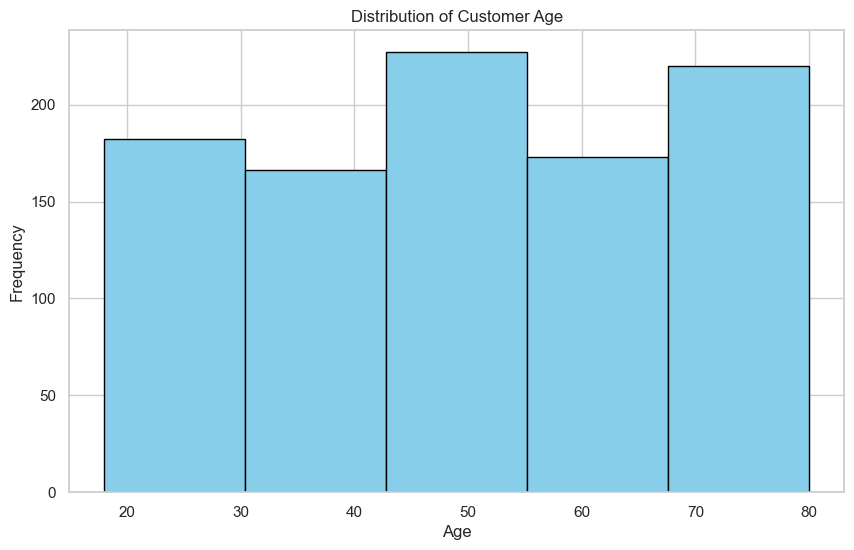

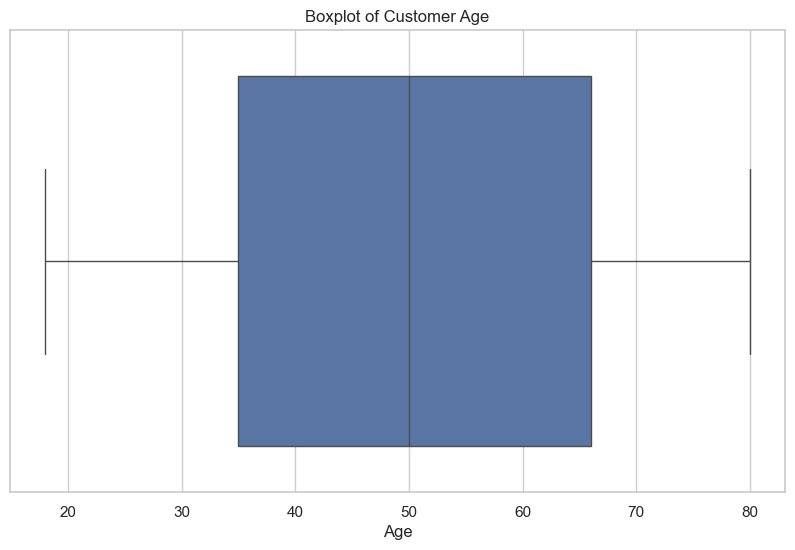

count    968.000000
mean      49.923554
std       18.115119
min       18.000000
25%       35.000000
50%       50.000000
75%       66.000000
max       80.000000
Name: Age, dtype: float64


In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Customer Age')
plt.xlabel('Age')
plt.show()
print(df['Age'].describe())


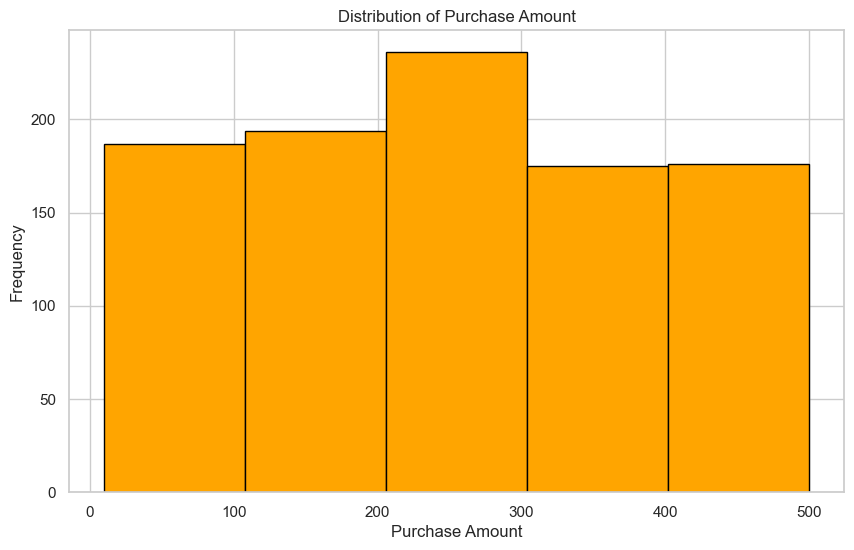

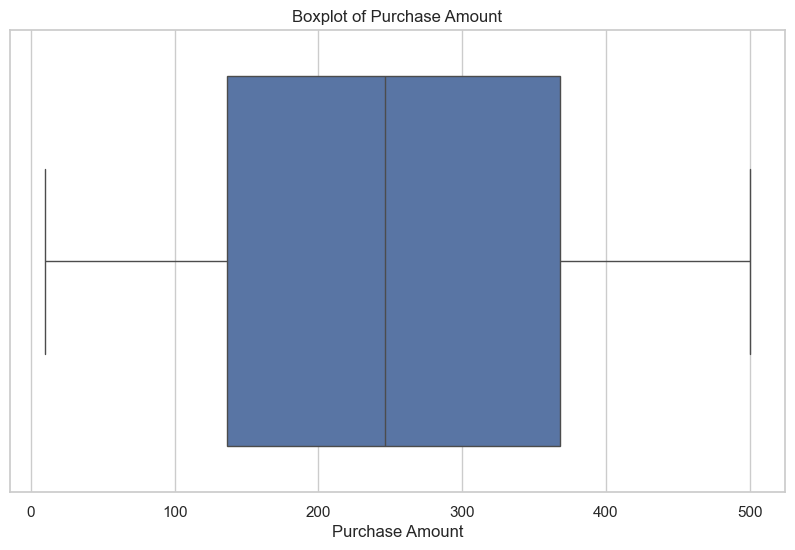

count    968.000000
mean     249.791322
std      137.380870
min       10.000000
25%      136.750000
50%      246.000000
75%      368.000000
max      500.000000
Name: Purchase_Amount, dtype: float64


In [40]:
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase_Amount'], bins=5, color='orange', edgecolor='black')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()
print(df['Purchase_Amount'].describe())


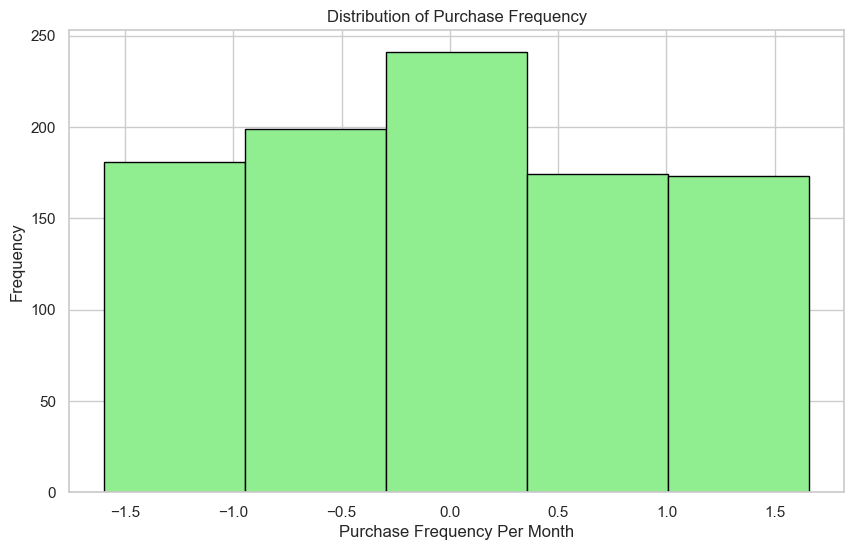

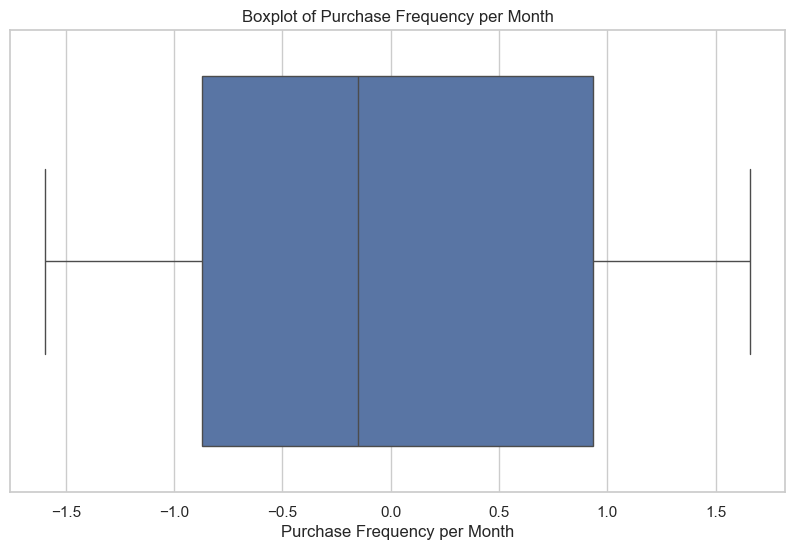

count    968.000000
mean      -0.002160
std        0.996733
min       -1.595270
25%       -0.872283
50%       -0.149297
75%        0.935183
max        1.658170
Name: Purchase_Frequency_Per_Month, dtype: float64


In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase_Frequency_Per_Month'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase_Frequency_Per_Month'])
plt.title('Boxplot of Purchase Frequency per Month')
plt.xlabel('Purchase Frequency per Month')
plt.show()
print(df['Purchase_Frequency_Per_Month'].describe())

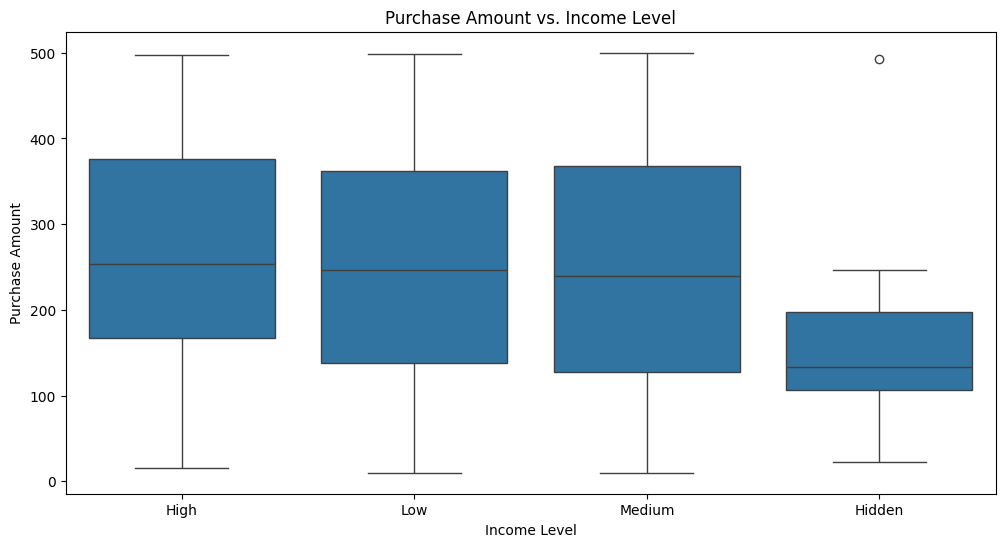

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=df)
plt.title('Purchase Amount vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.show()


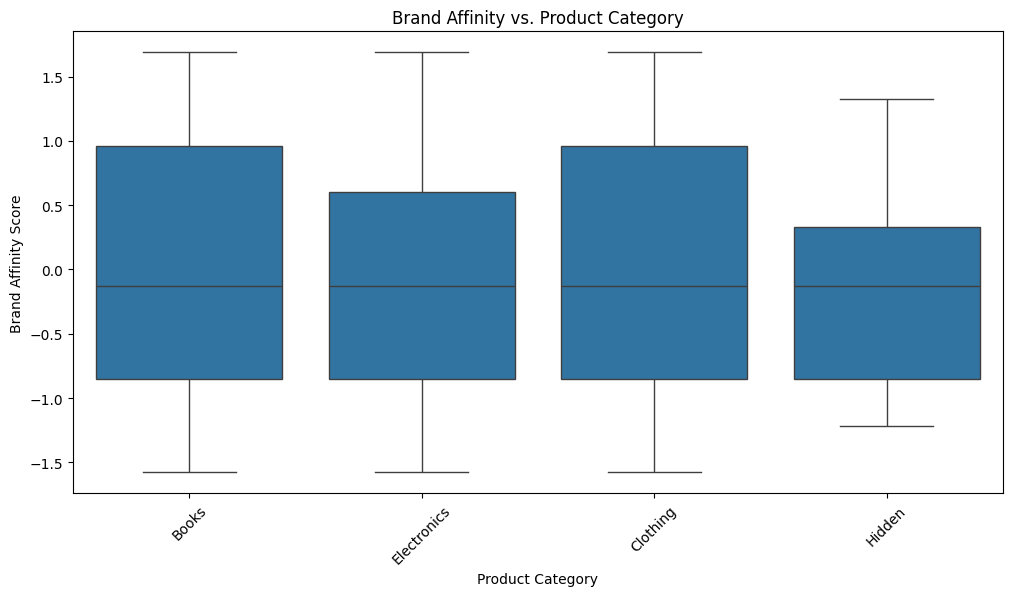

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Brand_Affinity_Score', data=df)
plt.title('Brand Affinity vs. Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Brand Affinity Score')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


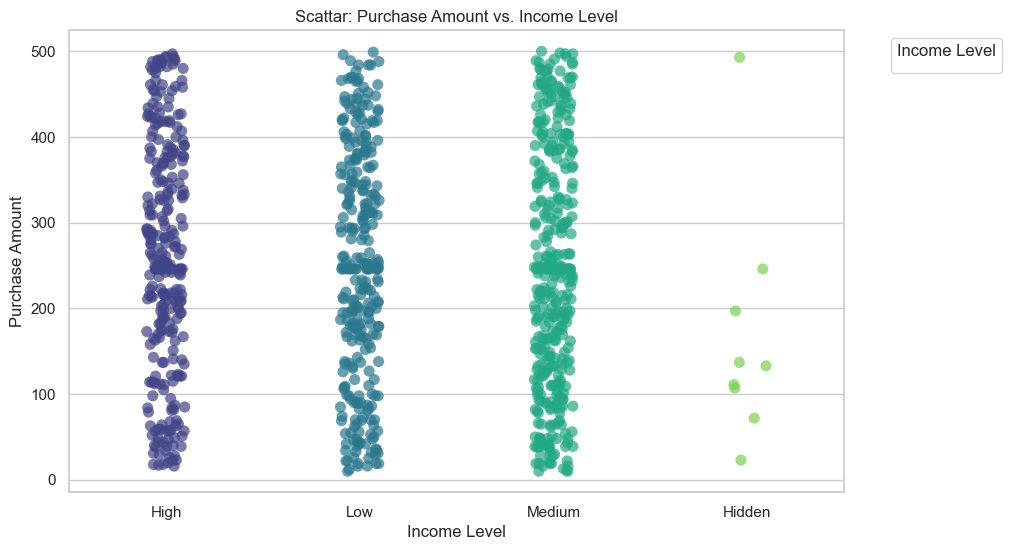

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(x='Income_Level', y='Purchase_Amount', data=df, hue='Income_Level', palette='viridis', alpha=0.7, size=8)
plt.title('Scattar: Purchase Amount vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

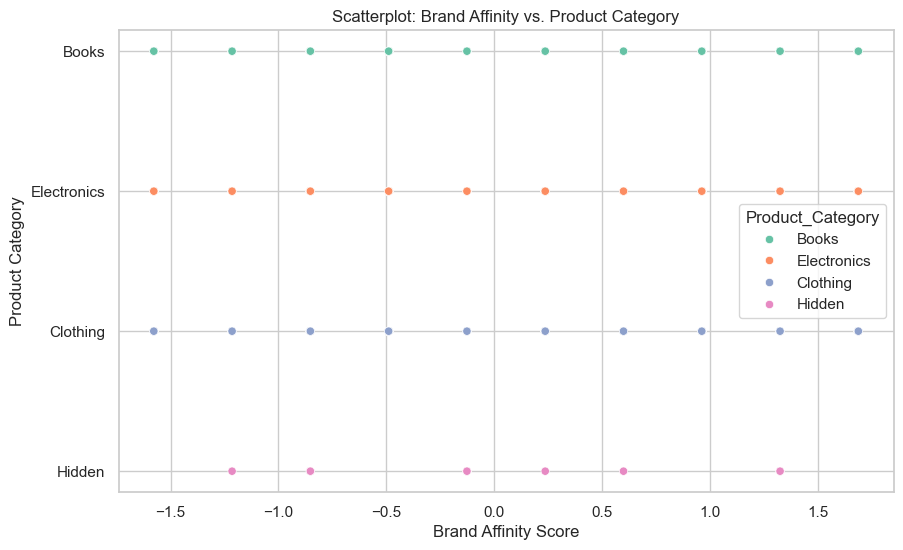

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Brand_Affinity_Score', y='Product_Category', data=df, hue='Product_Category', palette='Set2')
plt.title('Scatterplot: Brand Affinity vs. Product Category')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category')
plt.show()


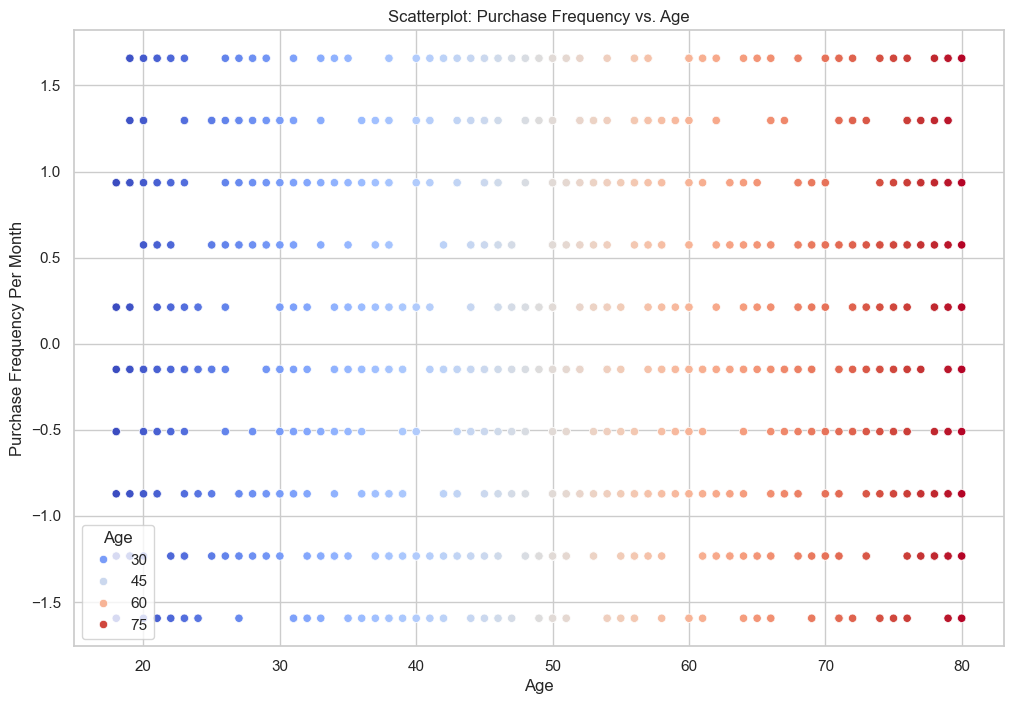

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Purchase_Frequency_Per_Month', data=df, hue='Age', palette='coolwarm')
plt.title('Scatterplot: Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency Per Month')
plt.show()

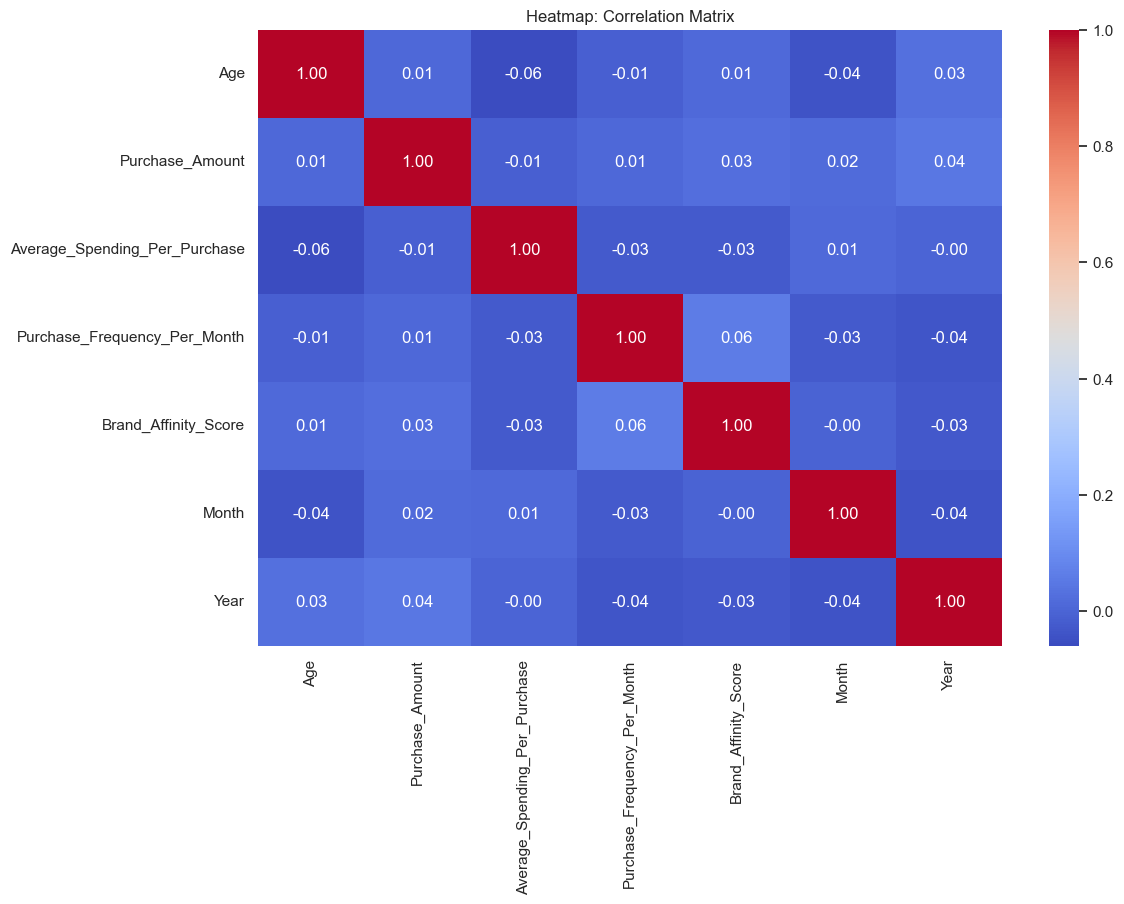

In [28]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Correlation Matrix')
plt.show()

# Temporal Analysis

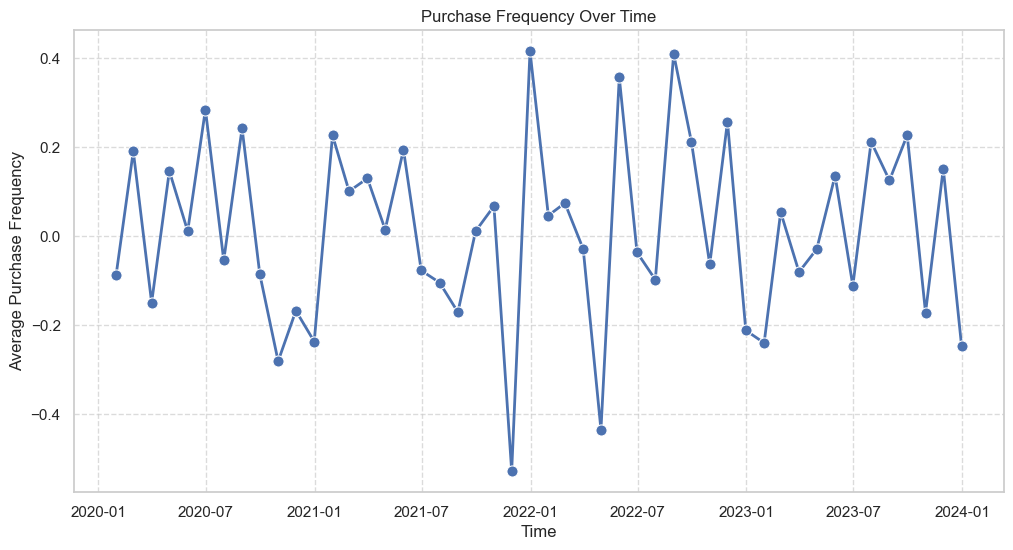

In [29]:
purchase_frequency_over_time = df.resample('M', on='Purchase_Date')['Purchase_Frequency_Per_Month'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=purchase_frequency_over_time.index, y=purchase_frequency_over_time.values, color='b', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Purchase Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Average Purchase Frequency')
plt.show()

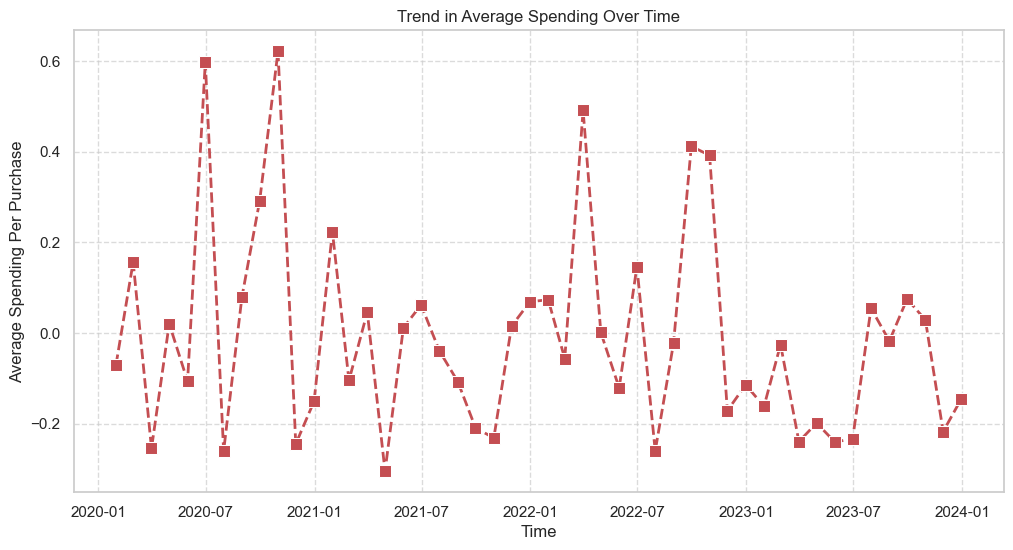

In [30]:
average_spending_over_time = df.resample('M', on='Purchase_Date')['Average_Spending_Per_Purchase'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_spending_over_time.index, y=average_spending_over_time.values, color='r', marker='s', linestyle='--', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Trend in Average Spending Over Time')
plt.xlabel('Time')
plt.ylabel('Average Spending Per Purchase')
plt.show()

C:\Users\DELL E5450\AppData\Local\Temp\ipykernel_17300\1584863710.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Purchase_Frequency_Per_Month', data=df, ci=None)


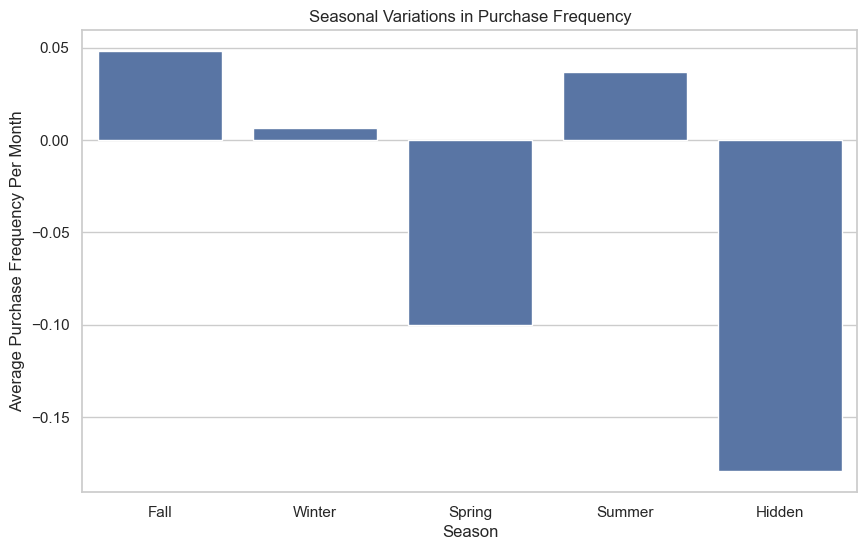

C:\Users\DELL E5450\AppData\Local\Temp\ipykernel_17300\1584863710.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Average_Spending_Per_Purchase', data=df, ci=None)


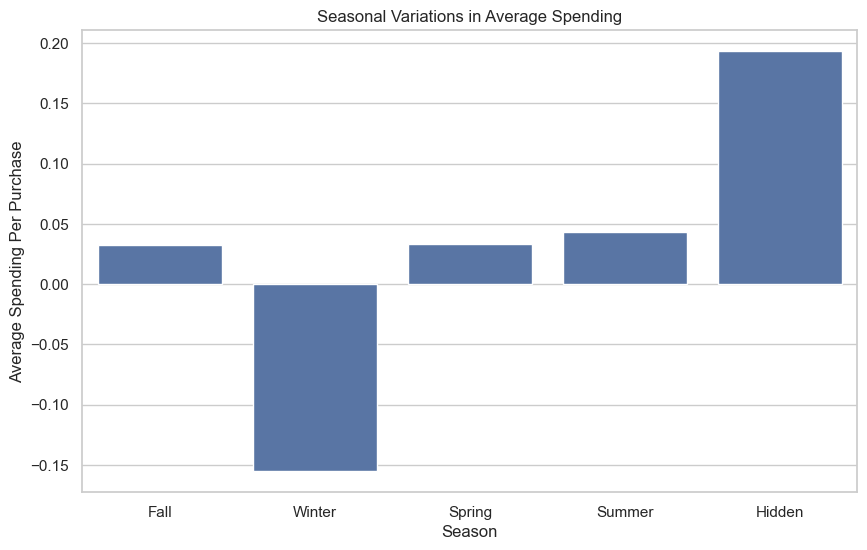

C:\Users\DELL E5450\AppData\Local\Temp\ipykernel_17300\1584863710.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Purchase_Date', y='Product_Category_Preferences', data=df, ci=None)


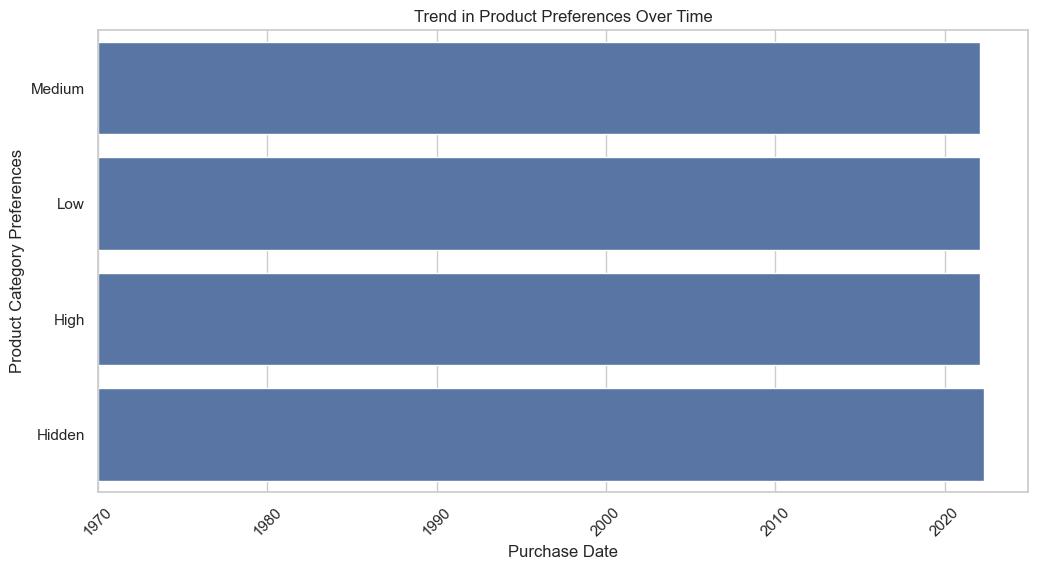

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Purchase_Frequency_Per_Month', data=df, ci=None)
plt.title('Seasonal Variations in Purchase Frequency')
plt.xlabel('Season')
plt.ylabel('Average Purchase Frequency Per Month')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Average_Spending_Per_Purchase', data=df, ci=None)
plt.title('Seasonal Variations in Average Spending')
plt.xlabel('Season')
plt.ylabel('Average Spending Per Purchase')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='Purchase_Date', y='Product_Category_Preferences', data=df, ci=None)
plt.title('Trend in Product Preferences Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Product Category Preferences')
plt.xticks(rotation=45)
plt.show()

In [32]:
mapping_dict = {'Low': 0, 'Medium': 0.5, 'High': 1}
df['Product_Category_Preferences_Value'] = df['Product_Category_Preferences'].map(mapping_dict)
df['Product_Category_Preferences_Value'].fillna(df['Product_Category_Preferences_Value'].median(), inplace=True)
df['Product_Category_Preferences_Value'].dropna()
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Product_Category_Preferences_Value
899,a73774fe-d420-46ca-8a43-44eb51438f5e,48.0,other,High,1412 Blake Parkway Apt. 316\nLake Rodneycheste...,c1cba058-2afd-41e4-826c-ea03c51afaad,2020-01-02,1c72a791-7b4d-4f7d-960e-7a611428a870,Books,<NA>,424.0,-0.321677,0.212197,-0.125932,Medium,1.0,1994.0,Fall,0.5
788,8f25e25c-75c7-4eb7-b2e2-f708dee8ef13,39.0,female,Low,414 Lauren Mountain Suite 243\nSouth Jessicabe...,638cded1-9504-4fc9-a1e1-09ee49388c8e,2020-01-03,495c76ec-35f1-4b80-86b5-b91558ffb2a5,Electronics,Brand_C,428.0,1.524227,-1.595270,0.599899,Low,1.0,2001.0,Winter,0.0
414,228febfa-bfb5-413a-ab8a-1eeb905b36fd,40.0,female,Low,"50568 Joseph Prairie\nPort Kimberlyview, ND 33279",96375f25-2e13-4e66-8e76-bbbf06760439,2020-01-04,aab09f53-a4a1-400e-932f-62120350545b,Electronics,Brand_B,407.0,-0.057976,1.296677,0.236984,High,1.0,1999.0,Fall,1.0
160,09427631-943f-4427-80e6-79c9da0c2613,71.0,other,High,"4363 Leslie Hills\nLake Mary, FL 20948",be33a103-bf30-4787-ad68-54a3efc8d675,2020-01-05,6cb25dba-2dd1-4724-84d0-322497ead674,Clothing,<NA>,381.0,-0.359349,-0.149297,0.962814,Low,1.0,1997.0,Spring,0.0
389,d8fbc8d7-7b8a-4903-85b7-630519ab33d7,40.0,male,Low,"0114 Jacob Passage Suite 324\nAmandastad, NV 1...",fa0db7eb-2748-4e3d-95dc-8bf48c5dac5f,2020-01-07,878b2b79-6f19-4162-9164-953af3f6e903,Books,Brand_C,451.0,0.055038,1.296677,1.325729,Low,1.0,2015.0,Winter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,79624cae-797c-46b2-a601-32b1a53b922a,56.0,other,Low,USCGC Brooks\nFPO AA 11570,0ebee131-d7f2-407a-80b1-4947484f32ea,2023-12-01,6a854b02-7c34-4226-bfc0-fa603348e305,<NA>,Brand_C,223.0,-1.263465,-1.233777,-0.488847,High,6.0,1994.0,Summer,1.0
925,1005d9e3-2274-4efe-9d4b-5490ac5d8e43,44.0,female,High,USCGC Freeman\nFPO AE 95564,3d4f42bf-ef29-4bec-a181-7a76fba28f70,2023-12-01,e54a0eaf-35f5-42f6-887e-443e3062b113,Electronics,Brand_C,65.0,-1.489494,-0.149297,1.688644,Medium,6.0,1987.0,Spring,0.5
936,fd81fe51-48b3-4942-a9cd-0555a118973d,22.0,male,High,"43267 Jacob Port\nDominguezville, PW 61902",cdf6bc11-be19-4c19-a882-944c26624879,2023-12-01,cd5e259f-0d33-49e6-b92d-6553963dc1c9,Clothing,Brand_B,258.0,-1.376480,0.212197,0.236984,Low,6.0,1984.0,Winter,0.0
984,110591d8-8f78-4321-9165-e6e927be2971,60.0,female,Medium,"473 Williams Stravenue\nNorth Heidi, WA 85750",Hidden,2023-12-01,97bfec3a-b9bf-4c8a-8e92-864ef9ef4967,Books,Brand_B,417.0,0.733125,1.658170,1.325729,Medium,6.0,1990.0,Fall,0.5


In [33]:
df_cluster = df[['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category_Preferences_Value']]
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)


# Elbow Method to Determine Optimal k

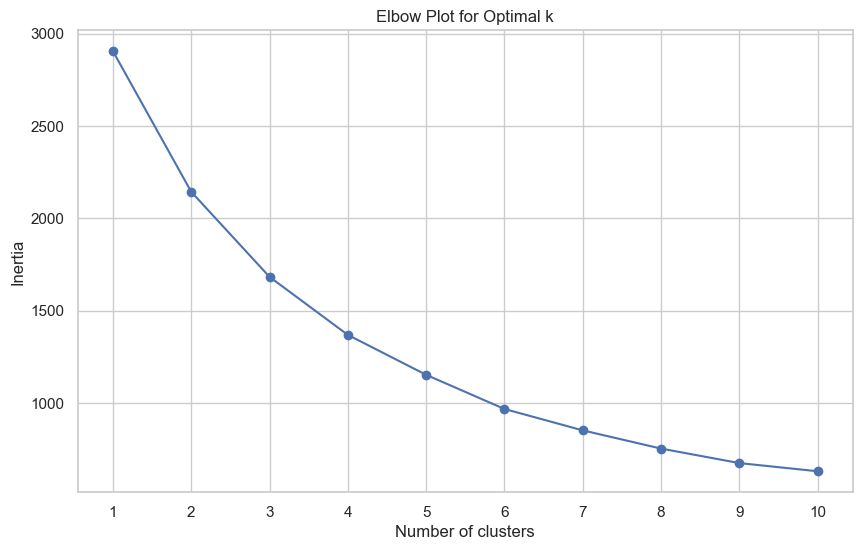

In [34]:
warnings.simplefilter(action='ignore', category=FutureWarning)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


 # Silhouette Analysis

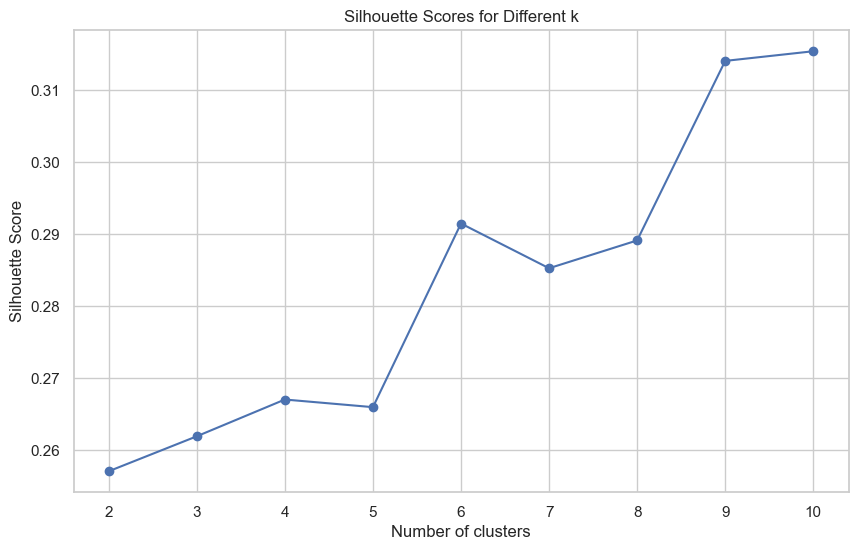

In [35]:
silhouette_scores = []
for k in k_values[1:]: 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    score = silhouette_score(df_cluster_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])
plt.show()


# Apply K-Means Algorithm

In [36]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_cluster_scaled)
df['Cluster'] = kmeans.labels_

# Analyze the Clusters

In [37]:
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

TypeError: agg function failed [how->mean,dtype->object]

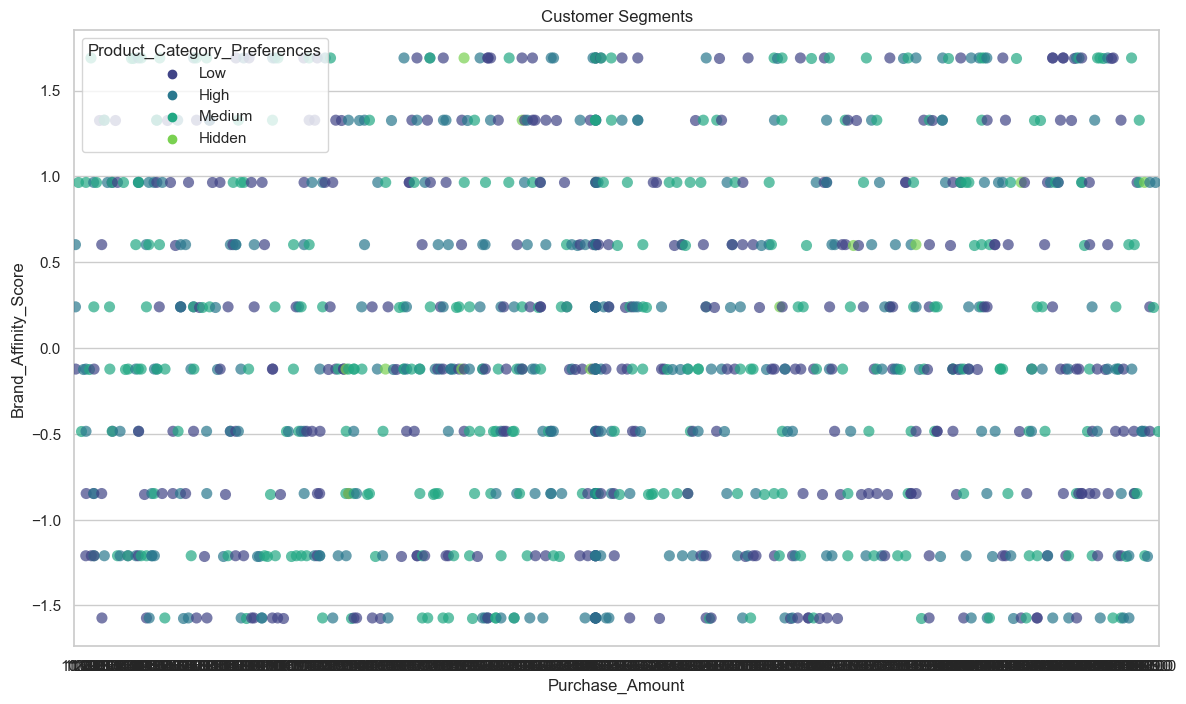

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.stripplot(x='Purchase_Amount', y='Brand_Affinity_Score', data=df, hue='Product_Category_Preferences', palette='viridis', alpha=0.7, size=8)
plt.title('Customer Segments')
plt.show()

# Group Data by Cluster

In [ ]:
cluster_groups = df.groupby('Cluster').agg(['mean', 'median', 'count'])
print(cluster_groups)


               Age                              Purchase_Date             \
              mean median count                          mean     median   
Cluster                                                                    
0        50.716923   50.0   325 2022-01-01 17:52:14.769230848 2022-02-10   
1        50.415282   50.0   301 2022-01-20 11:14:33.089701120 2022-01-31   
2        48.736842   48.0   342 2022-03-05 14:10:31.578947328 2022-02-23   

              Purchase_Amount              Average_Spending_Per_Purchase  ...  \
        count            mean median count                          mean  ...   
Cluster                                                                   ...   
0         325      374.240000  381.0   325                     -0.022029  ...   
1         301      240.860465  246.0   301                     -0.044030  ...   
2         342      139.388889  139.0   342                      0.059685  ...   

        DBS-Cluster KMeans-Cluster              K++_Clus

# Analyze Key Features for Each Cluster

In [ ]:
print("Average Purchase Amount by Cluster:")
print(cluster_groups['Purchase_Amount'])

Average Purchase Amount by Cluster:
               mean  median  count
Cluster                           
0        374.240000   381.0    325
1        240.860465   246.0    301
2        139.388889   139.0    342


In [ ]:
print("\nBrand Affinity Score by Cluster:")
print(cluster_groups['Brand_Affinity_Score'])


Brand Affinity Score by Cluster:
             mean    median  count
Cluster                           
0        0.144878  0.239696    325
1       -0.054190 -0.122844    301
2       -0.089982 -0.122844    342



# Step 3: Identify Differences and Similarities Between Clusters

In [ ]:
def custom_mode(x):
    modes = x.mode()
    return modes[0] if not modes.empty else None
top_category_by_cluster = df.groupby('Cluster')['Product_Category'].agg(custom_mode)
print(top_category_by_cluster)

Cluster
0    Electronics
1    Electronics
2    Electronics
Name: Product_Category, dtype: object


In [ ]:
for cluster, group in df.groupby('Cluster')['Product_Category']:
    print(f"\nCluster {cluster} - Product Category Distribution:")
    print(group.value_counts())


Cluster 0 - Product Category Distribution:
Electronics    112
Clothing       108
Books           89
Hidden           3
Name: Product_Category, dtype: int64

Cluster 1 - Product Category Distribution:
Electronics    106
Books           92
Clothing        81
Hidden           5
Name: Product_Category, dtype: int64

Cluster 2 - Product Category Distribution:
Electronics    128
Clothing        99
Books           95
Hidden           8
Name: Product_Category, dtype: int64


# DBSCAN Parameters

In [ ]:
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(2, 10)
results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_cluster_scaled)
        if len(set(labels)) > 1 and len(set(labels)) < len(df_cluster_scaled) - 1:
            silhouette_avg = silhouette_score(df_cluster_scaled, labels)
            results.append((eps, min_samples, silhouette_avg))
best_eps, best_min_samples, best_score = max(results, key=lambda item: item[2])
print(f"Best eps: {best_eps}, Best MinPts: {best_min_samples}, Best Silhouette Score: {best_score}")
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DB-Cluster'] = dbscan.fit_predict(df_cluster_scaled)
print(df['DB-Cluster'].value_counts())

Best eps: 0.1, Best MinPts: 2, Best Silhouette Score: 0.45435225818055197
-1      172
 84      11
 13      11
 10      10
 100     10
       ... 
 106      2
 103      2
 102      2
 101      2
 233      2
Name: DB-Cluster, Length: 235, dtype: int64


# Evaluate Clusters

In [ ]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DB-Cluster'] = dbscan.fit_predict(df_cluster_scaled)

print(df.groupby('DB-Cluster').mean())

                  Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DB-Cluster                                                              
-1          48.697674       263.959302                      -0.016239   
 0          57.500000       427.750000                      -0.719980   
 1          61.333333       424.000000                       0.324471   
 2          39.000000       411.500000                      -0.146002   
 3          47.000000       381.000000                       0.531479   
...               ...              ...                            ...   
 229        61.666667       247.000000                      -0.152275   
 230        41.500000       203.500000                      -0.955216   
 231        44.000000        67.000000                      -0.748208   
 232        53.000000       431.000000                      -0.202459   
 233        45.500000        89.000000                      -1.030492   

            Purchase_Frequency_Per_Month  Brand_Af

# Apply DBSCAN Algorithm

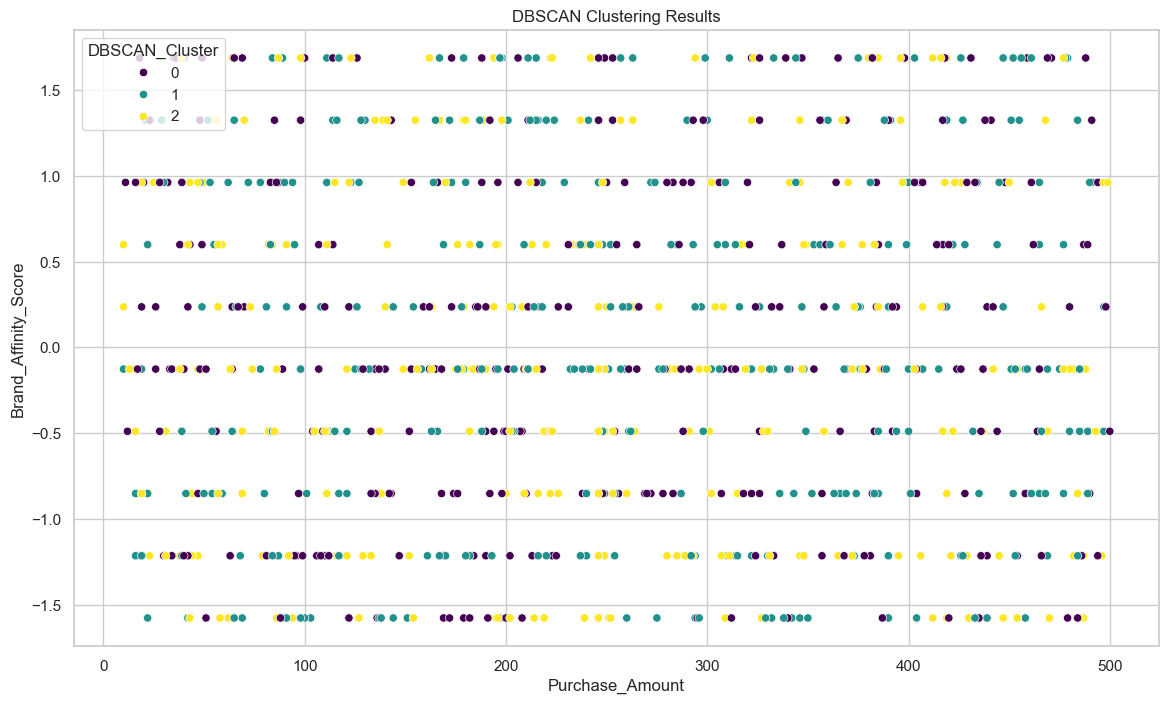

In [ ]:
optimal_eps = 0.5
optimal_min_samples = 5  
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
labels = dbscan.fit_predict(df_cluster_scaled)
df['DBSCAN_Cluster'] = labels
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# Analyze the Clusters

In [ ]:
optimal_eps = 0.5
optimal_min_samples = 5 
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
df['DBS-Cluster'] = dbscan.fit_predict(df_cluster_scaled)

In [ ]:
cluster_analysis = df.groupby('DB-Cluster').mean()
print(cluster_analysis)

                  Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DB-Cluster                                                              
-1          48.697674       263.959302                      -0.016239   
 0          57.500000       427.750000                      -0.719980   
 1          61.333333       424.000000                       0.324471   
 2          39.000000       411.500000                      -0.146002   
 3          47.000000       381.000000                       0.531479   
...               ...              ...                            ...   
 229        61.666667       247.000000                      -0.152275   
 230        41.500000       203.500000                      -0.955216   
 231        44.000000        67.000000                      -0.748208   
 232        53.000000       431.000000                      -0.202459   
 233        45.500000        89.000000                      -1.030492   

            Purchase_Frequency_Per_Month  Brand_Af

# Handle Noise Points

In [ ]:
noise_points = len(df[df['DB-Cluster'] == -1])
print(f"Number of noise points: {noise_points}")

Number of noise points: 172


# Analyze DBSCAN Cluster Characteristics

In [ ]:
cluster_sizes = df['DB-Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)
cluster_spread = df.groupby('DB-Cluster').std()
print("\nCluster Spread (Standard Deviation):\n", cluster_spread)

Cluster Sizes:
 -1      172
 84      11
 13      11
 10      10
 100     10
       ... 
 106      2
 103      2
 102      2
 101      2
 233      2
Name: DB-Cluster, Length: 235, dtype: int64

Cluster Spread (Standard Deviation):
                   Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DB-Cluster                                                              
-1          17.776106       153.695505                       0.970562   
 0          11.150486         6.238322                       0.427346   
 1          19.399313         3.464102                       1.096677   
 2           1.414214         6.363961                       0.133070   
 3          33.941125         0.000000                       1.250858   
...               ...              ...                            ...   
 229        26.633312         1.732051                       1.649352   
 230        23.334524         0.707107                       0.691964   
 231         0.000000         2.828427 

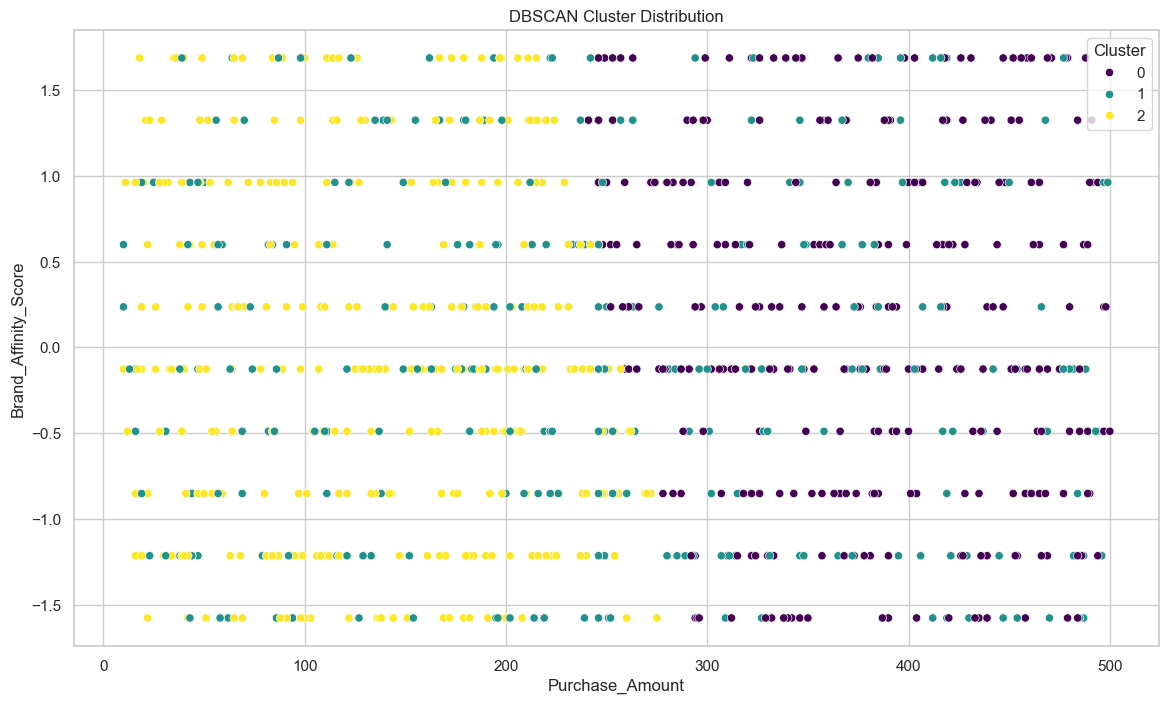

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='Cluster', data=df, palette='viridis', legend="full")
plt.title('DBSCAN Cluster Distribution')
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans-Cluster'] = kmeans.fit_predict(df_cluster_scaled)
df_kmeans = df[['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category_Preferences', 'KMeans-Cluster']]


In [ ]:
sns.scatterplot(x='Purchase_Amount', y='Brand_Affinity_Score', hue='KMeans-Cluster', data=df_kmeans, palette='viridis', legend="full")
plt.title('K-Means Cluster Distribution')
plt.show()



NameError: name 'df_kmeans' is not defined

# Apply K-Means++ Algorithm

In [ ]:
num_clusters = 3
kmeans_plus = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans_plus.fit(df_cluster_scaled)
df['K++_Cluster'] = kmeans_plus.labels_


# Analyze the Clusters

In [ ]:
cluster_analysis = df.groupby('K++_Cluster').mean()
print(cluster_analysis)

                   Age  Purchase_Amount  Average_Spending_Per_Purchase  \
K++_Cluster                                                              
0            50.716923       374.240000                      -0.022029   
1            50.415282       240.860465                      -0.044030   
2            48.736842       139.388889                       0.059685   

             Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
K++_Cluster                                                                 
0                               -0.047209              0.144878  6.538462   
1                                0.037957             -0.054190  6.275748   
2                                0.011456             -0.089982  6.526316   

                    Year  Product_Category_Preferences_Value  Cluster  \
K++_Cluster                                                             
0            1997.575385                           -0.592669      0.0   
1            1997.205980

In [ ]:
dbscan = DBSCAN(eps=best_eps_dbscan, min_samples=best_min_samples_dbscan)
df['DBSCAN-Cluster'] = dbscan.fit_predict(df_cluster_scaled)
df_dbscan = df[['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category_Preferences', 'DBSCAN-Cluster']]
df_dbscan_grouped = df_dbscan.groupby('DBSCAN-Cluster').mean()
print(df_dbscan_grouped)

                Purchase_Amount  Brand_Affinity_Score
DBSCAN-Cluster                                       
-1                   263.959302              0.022593
 0                   427.750000             -0.122844
 1                   424.000000              0.602235
 2                   411.500000              0.239696
 3                   381.000000              0.964775
...                         ...                   ...
 229                 247.000000             -1.210463
 230                 203.500000             -0.485384
 231                  67.000000              1.689854
 232                 431.000000              0.964775
 233                  89.000000              0.602235

[235 rows x 2 columns]


# Analyze K-Means++ Clusters

In [ ]:
kmeans_plus_clusters = df.groupby('K++_Cluster').mean()
print("K-Means++ Cluster Centers:\n", kmeans_plus_clusters)


K-Means++ Cluster Centers:
                    Age  Purchase_Amount  Average_Spending_Per_Purchase  \
K++_Cluster                                                              
0            50.716923       374.240000                      -0.022029   
1            50.415282       240.860465                      -0.044030   
2            48.736842       139.388889                       0.059685   

             Purchase_Frequency_Per_Month  Brand_Affinity_Score     Month  \
K++_Cluster                                                                 
0                               -0.047209              0.144878  6.538462   
1                                0.037957             -0.054190  6.275748   
2                                0.011456             -0.089982  6.526316   

                    Year  Product_Category_Preferences_Value  Cluster  \
K++_Cluster                                                             
0            1997.575385                           -0.592669      0.0

# Analyze Regular K-Means Clusters

In [ ]:
kmeans_clusters = df_kmeans.groupby('KMeans-Cluster').mean()
print("Regular K-Means Cluster Centers:\n", kmeans_clusters)

Regular K-Means Cluster Centers:
                 Purchase_Amount  Brand_Affinity_Score
KMeans-Cluster                                       
0                    374.240000              0.144878
1                    240.860465             -0.054190
2                    139.388889             -0.089982


In [ ]:
num_clusters = 3 
kmeans_plus = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans_plus.fit(df_cluster_scaled)
df['K++_Cluster'] = kmeans_plus.labels_
df_kmeans_plus = df[['Purchase_Amount', 'Brand_Affinity_Score', 'Product_Category_Preferences', 'K++_Cluster']]
df_kmeans_plus_grouped = df_kmeans_plus.groupby('K++_Cluster').mean()
print(df_kmeans_plus_grouped)


             Purchase_Amount  Brand_Affinity_Score
K++_Cluster                                       
0                 374.240000              0.144878
1                 240.860465             -0.054190
2                 139.388889             -0.089982


# Compare Cluster Centers

In [ ]:
silhouette_kmeans_plus = silhouette_score(df_cluster_scaled, df['K++_Cluster'])
silhouette_kmeans = silhouette_score(df_cluster_scaled, df_kmeans['KMeans-Cluster'])
print("Silhouette Score for K-Means++: ", silhouette_kmeans_plus)
print("Silhouette Score for Regular K-Means: ", silhouette_kmeans)

Silhouette Score for K-Means++:  0.2619508639893525
Silhouette Score for Regular K-Means:  0.2619508639893525


In [ ]:
iterations_kmeans_plus = kmeans_plus.n_iter_
iterations_kmeans = kmeans.n_iter_  
print("Iterations for K-Means++: ", iterations_kmeans_plus)
print("Iterations for Regular K-Means: ", iterations_kmeans)

Iterations for K-Means++:  8
Iterations for Regular K-Means:  8


In [ ]:
print("K-Means Cluster Analysis:\n", df_kmeans.groupby('KMeans-Cluster').mean())
print("\nDBSCAN Cluster Analysis:\n", df_dbscan.groupby('DBSCAN-Cluster').mean())
print("\nK-Means++ Cluster Analysis:\n", df_kmeans_plus.groupby('K++_Cluster').mean())


K-Means Cluster Analysis:
                 Purchase_Amount  Brand_Affinity_Score
KMeans-Cluster                                       
0                    374.240000              0.144878
1                    240.860465             -0.054190
2                    139.388889             -0.089982

DBSCAN Cluster Analysis:
                 Purchase_Amount  Brand_Affinity_Score
DBSCAN-Cluster                                       
-1                   263.959302              0.022593
 0                   427.750000             -0.122844
 1                   424.000000              0.602235
 2                   411.500000              0.239696
 3                   381.000000              0.964775
...                         ...                   ...
 229                 247.000000             -1.210463
 230                 203.500000             -0.485384
 231                  67.000000              1.689854
 232                 431.000000              0.964775
 233                  89.000

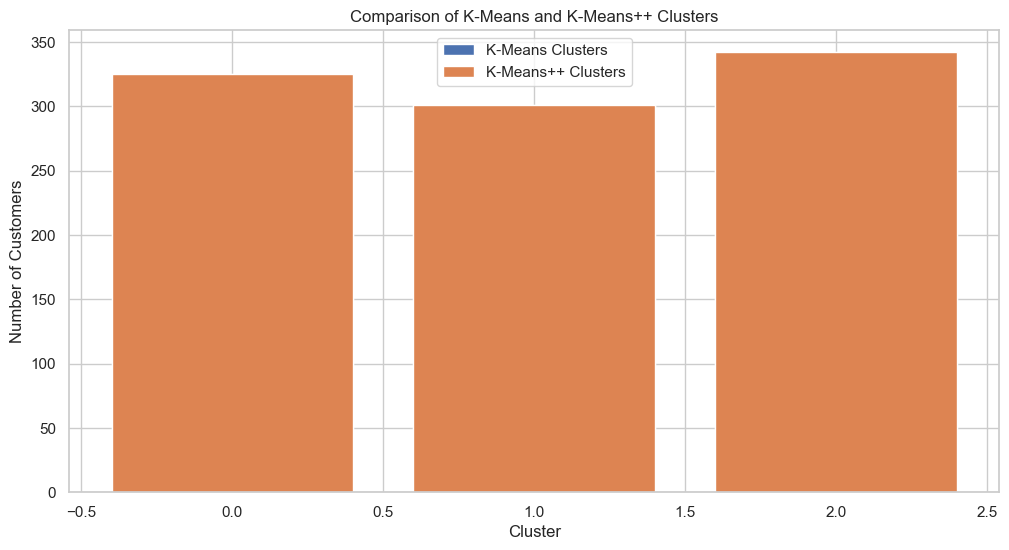

In [ ]:
kmeans_clusters = df['Cluster'].value_counts().sort_index()
kmeans_pp_clusters = df['K++_Cluster'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(kmeans_clusters.index, kmeans_clusters.values, label='K-Means Clusters')
plt.bar(kmeans_pp_clusters.index, kmeans_pp_clusters.values, label='K-Means++ Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Comparison of K-Means and K-Means++ Clusters')
plt.legend()
plt.show()

# Evaluate Cluster Quality

In [ ]:
silhouette_kmeans = silhouette_score(df_cluster_scaled, df_kmeans['KMeans-Cluster'])
calinski_kmeans = calinski_harabasz_score(df_cluster_scaled, df_kmeans['KMeans-Cluster'])
davies_kmeans = davies_bouldin_score(df_cluster_scaled, df_kmeans['KMeans-Cluster'])
print("K-Means Metrics: Silhouette: {}, Calinski-Harabasz: {}, Davies-Bouldin: {}".format(silhouette_kmeans, calinski_kmeans, davies_kmeans))

K-Means Metrics: Silhouette: 0.2619508639893525, Calinski-Harabasz: 349.78922924144894, Davies-Bouldin: 1.362337357524172


In [ ]:


silhouette_kmeans = silhouette_score(df_cluster_scaled, df_dbscan['DBSCAN-Cluster'])
calinski_kmeans = calinski_harabasz_score(df_cluster_scaled, df_dbscan['DBSCAN-Cluster'])
davies_kmeans = davies_bouldin_score(df_cluster_scaled, df_dbscan['DBSCAN-Cluster'])

print("K-Means Metrics: Silhouette: {}, Calinski-Harabasz: {}, Davies-Bouldin: {}".format(silhouette_kmeans, calinski_kmeans, davies_kmeans))



K-Means Metrics: Silhouette: 0.45435225818055197, Calinski-Harabasz: 12.85382529868537, Davies-Bouldin: 1.3733869123140832


In [ ]:

silhouette_kmeans = silhouette_score(df_cluster_scaled,df_kmeans_plus['K++_Cluster'])
calinski_kmeans = calinski_harabasz_score(df_cluster_scaled, df_kmeans_plus['K++_Cluster'])
davies_kmeans = davies_bouldin_score(df_cluster_scaled, df_kmeans_plus['K++_Cluster'])
print("K-Means Metrics: Silhouette: {}, Calinski-Harabasz: {}, Davies-Bouldin: {}".format(silhouette_kmeans, calinski_kmeans, davies_kmeans))



K-Means Metrics: Silhouette: 0.2619508639893525, Calinski-Harabasz: 349.78922924144894, Davies-Bouldin: 1.362337357524172


In [ ]:
# Save DataFrame to CSV file
df.to_csv('DS-Final-Project', index=False)

# Save DataFrame to JSON file
df.to_json('DS-Final-Project', orient='records')
